# Supervised Learning - WALMART SALES PREDICTION
## Context



 
## Objective



 
## Data Description
The detailed data dictionary is given below.

**Data Dictionary Features**



In [417]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [418]:
#Store - The store number
#Date - The week of sales
#Weekly_Sales - sales for the given store
#Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
#Temperature - Temperature on the day of sale
#Fuel_Price - Cost of fuel in the region
#CPI – Prevailing consumer price index
#Unemployment - Prevailing unemployment rate

## Importing necessary libraries and data

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [420]:
df = pd.read_csv('Walmart.csv')

## Data Overview

- Observations
- Sanity checks

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Exploratory Data Analysis (EDA)


**Questions**:

> List possible questions to be answered


In [421]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [422]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [423]:
#Getting the statistical data of dataframe
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [424]:
#Checking type
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [425]:
#checking the shape of the dataframe
df.shape

(6435, 8)

In [426]:
#checking for null values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [427]:
#checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [428]:
df.duplicated().sum()

0

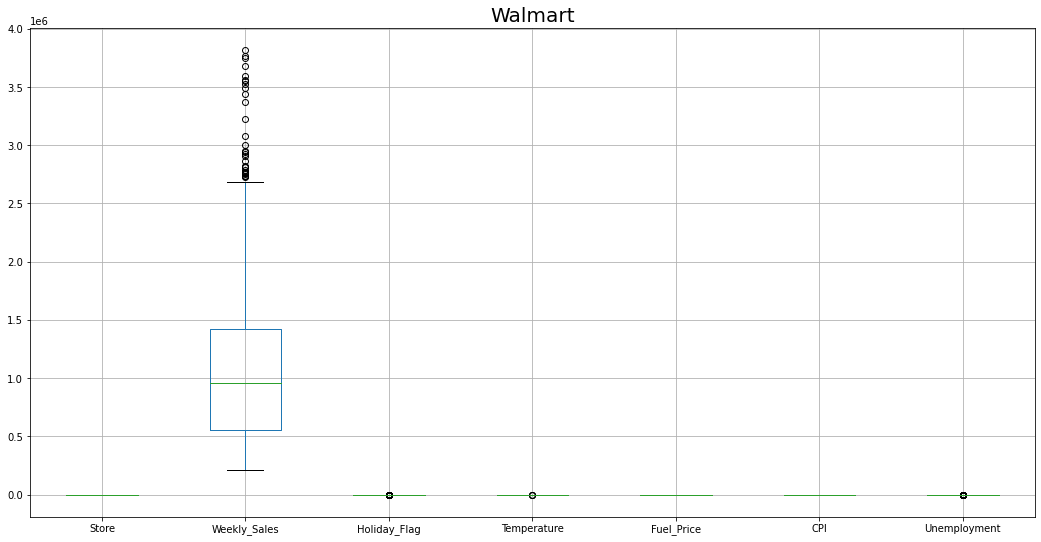

In [429]:
#checking for outliers using boxplot
plt.figure(figsize=(18,9))
df.boxplot()
plt.title("Walmart", fontsize=20)
plt.show()

In [430]:
#Finding the Position of the Outliers
print(np.where(df['Weekly_Sales']>2.746965e+06))

(array([ 189,  241,  471,  475,  523,  526,  527, 1329, 1332, 1333, 1381,
       1385, 1758, 1761, 1762, 1810, 1813, 1814, 1901, 1904, 1905, 1957,
       2759, 2761, 2762, 2763, 2811, 2814, 2815, 3764]),)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


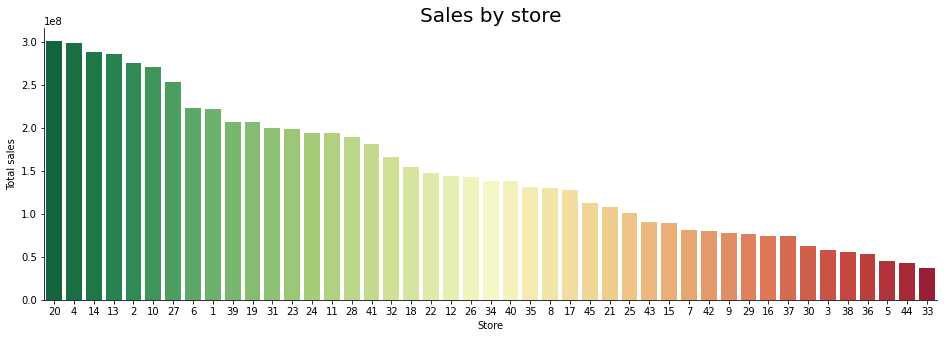

In [431]:
#Total sales made by each store
sales_by_store=df.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total sales").sort_values(by="Total sales",ascending=False)
plt.figure(figsize=(16,5))
sns.barplot(sales_by_store["Store"],sales_by_store["Total sales"],palette="RdYlGn_r",order=sales_by_store["Store"].tolist())
sns.despine()
plt.title("Sales by store",fontsize=20)
plt.show()

In [432]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [433]:
df.Holiday_Flag.unique()

array([0, 1])

In [434]:
#Checking to see if the date format is uniform
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [435]:
#Finding the correlation between columns
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


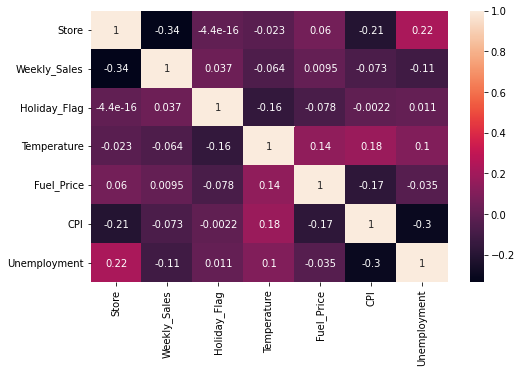

In [436]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True, )
plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [437]:
#change date datatype
df.Date = pd.to_datetime(df.Date)

In [438]:
# Extract the day, month, year from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year

In [439]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,4,10,2012


In [440]:
# Converting the numerical values to categorical values in the day, month, year columns
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['day'] = df['day'].map(days)
months={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',7:'July', 8:'August', 9:'September',10:'October',11:'November', 12:'December'}
df['month']= df['month'].map(months)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


In [441]:
#split year and month from the Date column
df['year'],df['month'] = df['Date'].dt.year,df['Date'].dt.month

sort sales by date

In [442]:
# Total yearly sales
year_sales=df.groupby('year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()
year_sales

,Weekly_Sales
year,
2011,2.448200e+09
2010,2.288886e+09
2012,2.000133e+09


<Figure size 1800x1080 with 0 Axes>

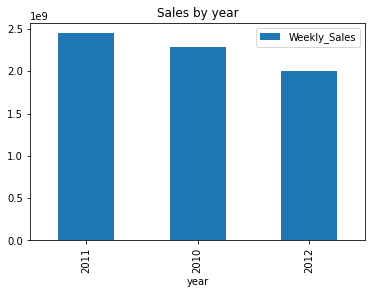

In [443]:
#visualize the sales by year
plt.figure(figsize=[25,15])
year_sales.plot(kind = 'bar', title= 'Sales by year');

In [444]:
#checking for month with the highest sales
month_sales= df.groupby(['month'])['Weekly_Sales'].max().sort_values(ascending = False).to_frame()
month_sales

,Weekly_Sales
month,
12,3818686.45
11,3004702.33
10,2752122.08
5,2623469.95
6,2565259.92
9,2546123.78
2,2495630.51
3,2416051.17
7,2370116.52


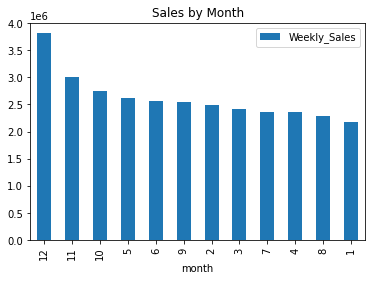

In [445]:
#visualize the sales by month
month_sales.plot(kind = 'bar', title= 'Sales by Month');

In [446]:
#checking for day with the highest sales
day_sales= df.groupby(['day'])['Weekly_Sales'].max().sort_values(ascending = False).to_frame()
day_sales

,Weekly_Sales
day,
Thursday,3818686.45
Monday,2752122.08
Saturday,2623469.95
Sunday,2565259.92
Wednesday,2495630.51
Friday,2351143.07
Tuesday,2211388.14


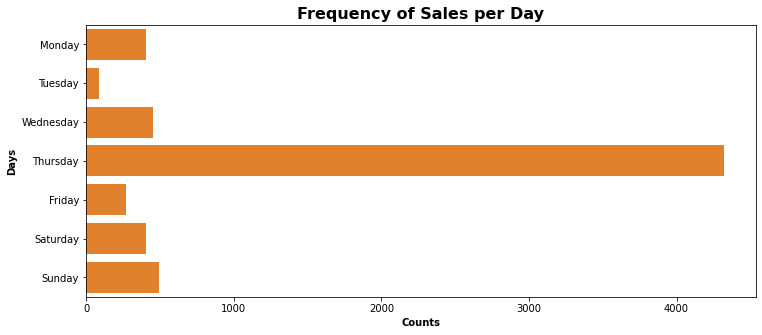

In [447]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data=df, y='day', color=base_color, order = order)
plt.title('Frequency of Sales per Day', fontsize=16, fontweight='bold')
plt.xlabel('Counts', fontweight='bold');
plt.ylabel('Days',fontweight='bold');

In [448]:
#checking Sales by year
year_sales = df.groupby(['year'])['Weekly_Sales'].sum()
year_sales

year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

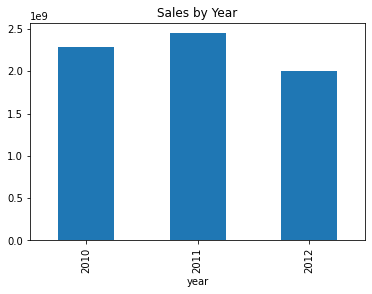

In [449]:
#visualize sales by year
year_sales.plot(kind='bar', title = 'Sales by Year');

Aggregating Weekly sales based on store and holiday flag

In [450]:
New_store = df.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales':['mean','max','sum']})
New_store = New_store.reset_index()
New_store

Store Holiday_Flag  Weekly_Sales                          
                               mean         max           sum
0      1            0  1.546957e+06  2387950.20  2.057453e+08
1      1            1  1.665748e+06  2033320.66  1.665748e+07
2      2            0  1.914209e+06  3436007.68  2.545898e+08
3      2            1  2.079267e+06  2658725.29  2.079267e+07
4      3            0  4.000648e+05   605990.41  5.320862e+07
..   ...          ...           ...         ...           ...
85    43            1  6.359463e+05   722120.04  6.359463e+06
86    44            0  3.032536e+05   376233.89  4.033273e+07
87    44            1  2.960356e+05   338737.33  2.960356e+06
88    45            0  7.821985e+05  1682862.03  1.040324e+08
89    45            1  8.362937e+05  1182500.16  8.362937e+06

[90 rows x 5 columns]

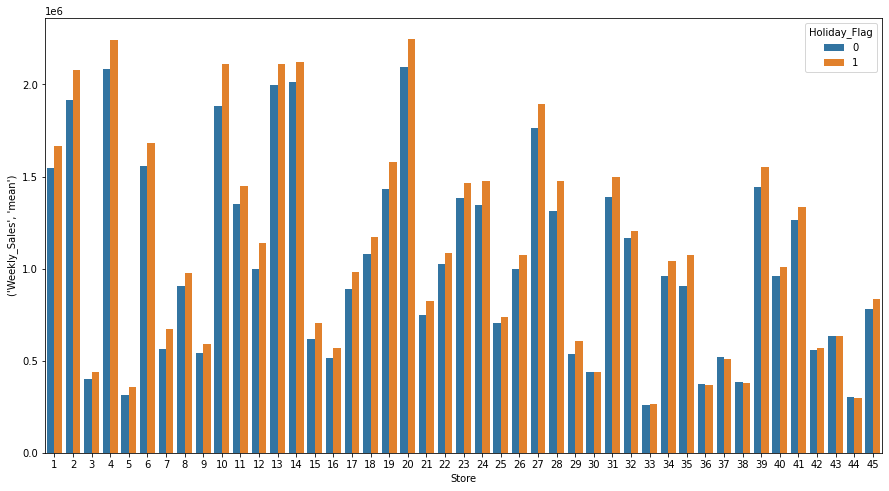

In [451]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday_Flag',data=New_store)

In [452]:
#Get the max sales by weekly sales
#Sales['max_sales']= Sales.Weekly_Sales.max()

#Sales['max_sales'].head(1)

Creating dummy variables for Categorical features


In [453]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,5,2010


In [454]:
#Top 10 stores 
Top_stores = df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending = False).head(10)
Top_stores.to_frame().reset_index()


,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [455]:
# Average weekly sales of the top 10 stores 
df.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending=False).head(10).reset_index()

,Store,Weekly_Sales
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06
5,10,1.899425e+06
6,27,1.775216e+06
7,6,1.564728e+06
8,1,1.555264e+06
9,39,1.450668e+06


In [456]:
# Effect of fuel price on weekly sales
df.groupby('Fuel_Price')['Weekly_Sales'].sum().to_frame()

,Weekly_Sales
Fuel_Price,
2.472,470281.03
2.513,434471.38
2.514,14211389.79
2.520,447519.44
2.533,431294.45
...,...
4.294,5255081.92
4.301,5118684.85
4.308,2662689.06


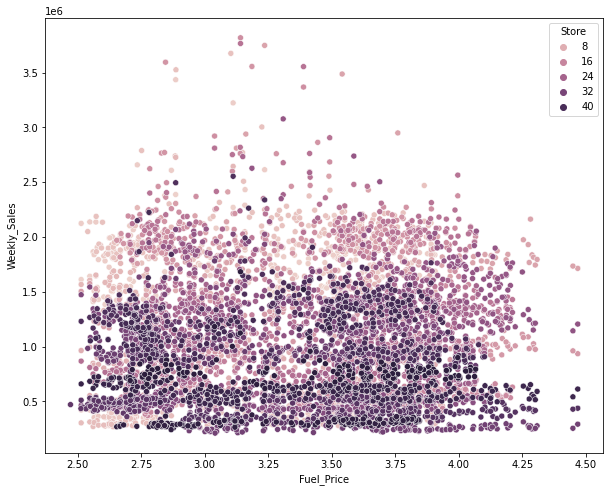

In [457]:
# Effect of fuel price on weekly sales (visualization)
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Fuel_Price', y = 'Weekly_Sales', hue = 'Store', data = df)


            Weekly_Sales
CPI                     
126.064000   11186672.61
126.076645   11236542.21
126.085452   11617124.06
126.089290   10644403.61
126.101935   11446981.89
...                  ...
227.018417     900309.75
227.036936     891671.44
227.169392     558464.80
227.214288     542009.46
227.232807     549731.49

[2145 rows x 1 columns]


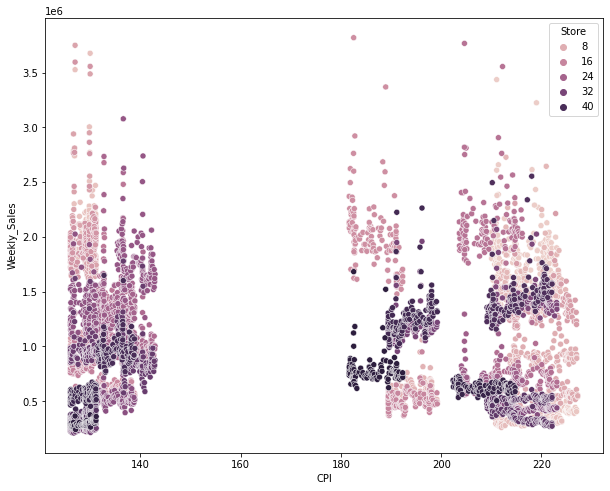

In [458]:
# Effect of CPI on weekly sales
print(df.groupby('CPI')['Weekly_Sales'].sum().to_frame())
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'CPI', y = 'Weekly_Sales', hue = 'Store', data = df)


      Temperature  Weekly_Sales
0           72.62   10886393.75
1           76.03   10418588.73
2           50.43   10312566.90
3           76.67    9857252.53
4           62.62    9594012.18
...           ...           ...
3523        95.28     224806.96
3524        61.95     224639.76
3525        91.45     224294.39
3526        94.00     224031.19
3527        52.91     219804.85

[3528 rows x 2 columns]


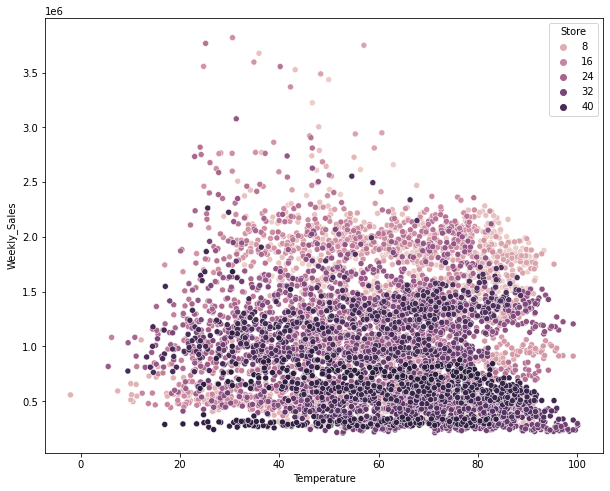

In [459]:
# Effect of daily temperature on weekly sales
print(df.groupby('Temperature')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).reset_index())
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Temperature', y = 'Weekly_Sales', hue = 'Store', data = df)

     Unemployment  Weekly_Sales
0           8.099   84045715.04
1           8.163   68057280.53
2           7.441   63874722.26
3           7.852   60331223.67
4           8.200   58491673.00
..            ...           ...
344         9.151    2086249.72
345         5.847    2016067.98
346         5.217    1360020.41
347         5.422    1301302.62
348         6.895    1065369.52

[349 rows x 2 columns]


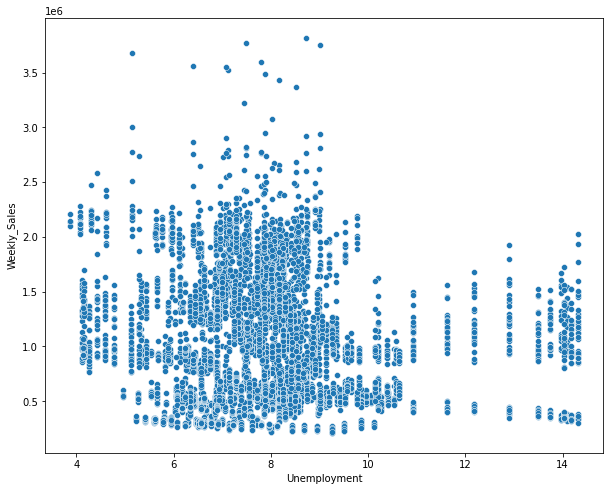

In [460]:
# how does unemployment levels affect weekly sales
print(df.groupby('Unemployment')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).reset_index())
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',data = df,legend = False)
plt.show()

In [461]:
#Holiday Events
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Text(0.5, 1.0, ' Total Yearly Sales')

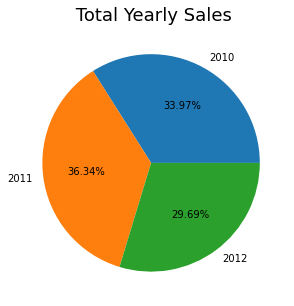

In [462]:
 plt.figure(figsize=(7,5))
 plt.pie(df.groupby('year')['Weekly_Sales'].sum().values, labels=df.groupby('year')['Weekly_Sales'].sum().index, autopct='%.2f%%')
 plt.title(f' Total Yearly Sales', color='black', fontsize= 18)

In [463]:
df['month']= df['month'].map(months)

Text(0.5, 1.0, ' Total Monthly Sales')

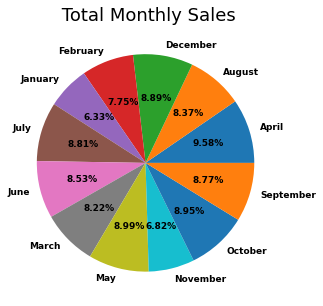

In [464]:
plt.figure(figsize=(7,5))
plt.pie(df.groupby('month')['Weekly_Sales'].sum().values, labels=df.groupby('month')['Weekly_Sales'].sum().index, autopct='%.2f%%', textprops= {'fontweight':'black', 'fontsize': '9'})
plt.title(f' Total Monthly Sales', color='black', fontsize= 18)

Text(0.5, 1.0, ' Total Daily Sales')

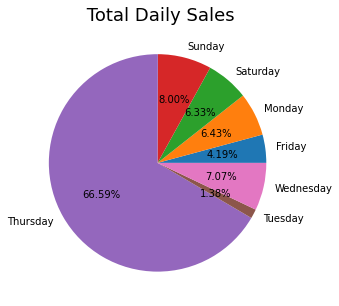

In [465]:
plt.figure(figsize=(7,5))
plt.pie(df.groupby('day')['Weekly_Sales'].sum().values, labels=df.groupby('day')['Weekly_Sales'].sum().index, autopct='%.2f%%')
plt.title(f' Total Daily Sales', color='black', fontsize= 18)

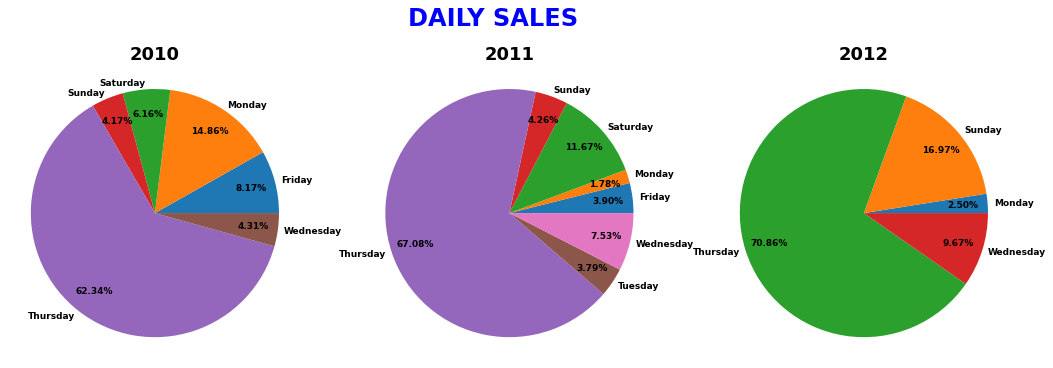

In [466]:
# The highest daily sales in each year
fig, axs = plt.subplots(1, 3, figsize=(18,6))
textprops={"color":"black", "weight":"semibold", "fontsize": 9} 
axs[0].pie(df[df['year']==2010].groupby('day')['Weekly_Sales'].sum().values,labels = df[df['year']==2010].groupby('day')['Weekly_Sales'].sum().index, textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[0].set_title('2010', fontsize= 18, fontweight = 'black')

axs[1].pie(df[df['year']==2011].groupby('day')['Weekly_Sales'].sum().values,labels = df[df['year']==2011].groupby('day')['Weekly_Sales'].sum().index, textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[1].set_title('2011', fontsize= 18, fontweight = 'black')

axs[2].pie(df[df['year']==2012].groupby('day')['Weekly_Sales'].sum().values,labels = df[df['year']==2012].groupby('day')['Weekly_Sales'].sum().index,textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[2].set_title('2012', fontsize= 18, fontweight = 'black')
plt.suptitle('DAILY SALES', color='blue', fontsize= 24,fontweight = 'bold')
plt.show()

### DATA SCALING & SPLITING

In [467]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012


In [468]:
#Dropping the now redundant Date column
df.drop(['Date'], axis= 'columns', inplace= True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012


In [469]:
from sklearn.preprocessing import LabelEncoder

In [470]:
le_day = LabelEncoder()
le_month= LabelEncoder()
le_year = LabelEncoder()

In [471]:
df['day_x'] = le_day.fit_transform(df['day'])
df['month_x'] = le_month.fit_transform(df['month'])
df['year_x'] = le_year.fit_transform(df['year'])

In [472]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,day_x,month_x,year_x
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,2,8,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,6,2,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,4,3,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,4,3,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,4,11,2
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012,6,8,2
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012,3,2,2
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,4,10,2


In [473]:
#Dropping the day, month and year unencoded columns
le_df= df.drop(['day','month','year'],axis = 'columns')
le_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day_x,month_x,year_x
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,8,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,3,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,3,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,8,0
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,11,2
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,6,8,2
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,3,2,2
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2


In [474]:
#Training and splitting of the dataset
from sklearn.model_selection import train_test_split


In [477]:
#Independent variables: Temperature, Fuel_Price, CPI	, Unemployment, Holiday_Flag,  Unemployment, Store, day, month, year
#Dependent variable: Weekly_Sales
y= le_df['Weekly_Sales']
x= le_df.drop(['Weekly_Sales'],axis = 'columns')

In [478]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#dropping of the dependent variable Weekly sales
#X = df.drop(['Weekly_Sales'],axis = 'columns')
#Y = df['Weekly_Sales']
#Splitting our data into train and test set. 80% of the data will be used to train, while 20% for test.
# A mask is also created to select random rows within our data set
msk = np.random.rand(len(le_df)) < 0.8
train = df[msk]
test = df[~msk]

In [ ]:
#, train.day, train. month, train. year
plt.scatter(train.year, train.Weekly_Sales, color='red')
plt.xlabel("year")
plt.ylabel("Weekly Sales")
plt.show()

In [ ]:
X= Date
Y= Weekly_Sales

In [ ]:
#Scaling of the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## UNIVARIATE ANALYSIS

In [ ]:
sns.distplot(df, x='Weekly_Sales')

## BIVARIATE ANALYSIS

In [ ]:
#temperature vs weekly sales
fig = plt.hist(df, x='Temperature', y ='Weekly_Sales')
fig.show()

## MULTIVARIATE ANALYSIS

## MODELING

## LINEAR REGRESSION

## Model performance evaluation

## DECISION TREE 

## Model performance evaluation

## GRADIENT BOOSTING

## Model performance evaluation

## Final Model Summary & Feature importance

## Actionable Insights and Recommendations

- 